# Bottom 10 Spenders

#### Load the data and necessary libraries

In [2]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('../../dsi_team_22/data/raw/pharma.csv')

## Exploring Year Range: 2005 to 2014

### Bottom 10 Lowest Spending Countries (Per Capita)

This table ranks the countries by their average spending per capita in USD, starting from the lowest.

| Rank | Country Code | Country Name     | Average Spending Per Capita ($ USD) |
|:----:|:------------:|:----------------:|:-----------------------------------:|
| 1    | LVA          | Latvia           | 269.196400                          |
| 2    | EST          | Estonia          | 269.575900                          |
| 3    | ISR          | Israel           | 274.791375                          |
| 4    | MEX          | Mexico           | 277.979500                          |
| 5    | POL          | Poland           | 304.320700                          |
| 6    | DNK          | Denmark          | 324.135200                          |
| 7    | LTU          | Lithuania        | 373.809400                          |
| 8    | CZE          | Czech Republic   | 395.318600                          |
| 9    | NOR          | Norway           | 412.787900                          |
| 10   | NLD          | Netherlands      | 428.909700                          |


#### Supporting Python Code:

In [2]:
# Filter the DataFrame to include only the years 2005 to 2014
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2014)]

# Exclude the dropped countries
df_filtered = df_filtered[~df_filtered['LOCATION'].isin(['GBR', 'NZL', 'TUR', 'RUS'])]

# Identify the Bottom 10 highest spending countries (Per Capita)
bottom_10_per_cap = df_filtered.groupby('LOCATION')['USD_CAP'].mean().sort_values(ascending=True).head(10)

# Display the results
print("Bottom 10 Lowest Spending Countries (Excluding GBR and NZL):")
print(bottom_10_per_cap)


Bottom 10 Lowest Spending Countries (Excluding GBR and NZL):
LOCATION
LVA    269.196400
EST    269.575900
ISR    274.791375
MEX    277.979500
POL    304.320700
DNK    324.135200
LTU    373.809400
CZE    395.318600
NOR    412.787900
NLD    428.909700
Name: USD_CAP, dtype: float64


## Data Visualization using Python

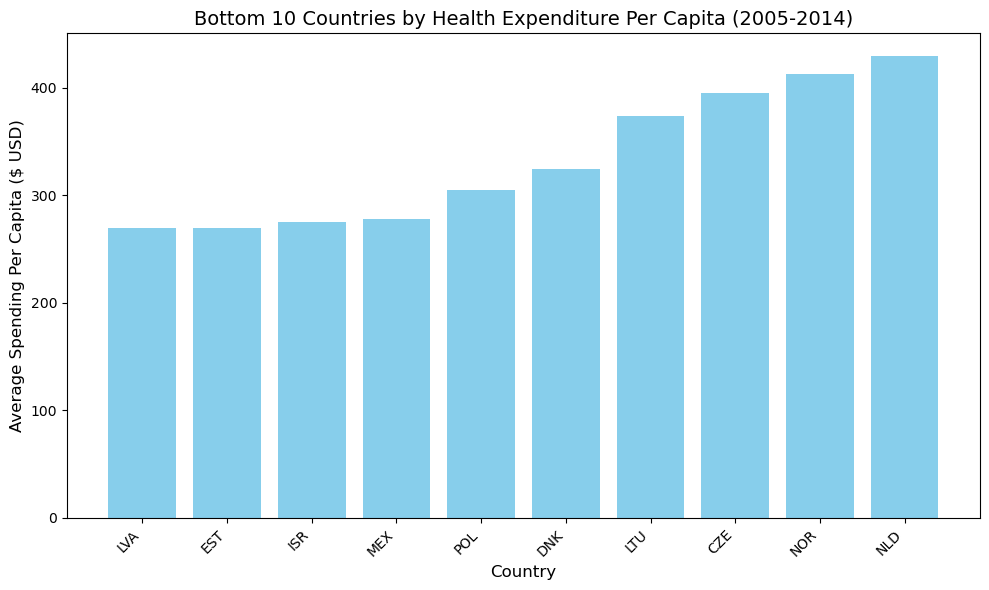

In [3]:
# Filter the DataFrame to include only the years 2005 to 2014
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2014)]

# Exclude the dropped countries
df_filtered = df_filtered[~df_filtered['LOCATION'].isin(['GBR', 'NZL', 'TUR', 'RUS'])]

# Identify the Bottom 10 highest spending countries (Per Capita)
bottom_10_per_cap = df_filtered.groupby('LOCATION')['USD_CAP'].mean().sort_values(ascending=True).head(10)

# Plot the bar chart for top 10 spenders
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_per_cap.index, bottom_10_per_cap.values, color='skyblue')
plt.title('Bottom 10 Countries by Health Expenditure Per Capita (2005-2014)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Spending Per Capita ($ USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()